# September 15, 2021 (Thursday) Data Analysis Notebook

In [1]:
# current date, for retrieving data from proper location.
year = "2021"
month = "September"
day = "15"

## Imports and initialization

In [2]:
from matplotlib import gridspec

In [3]:
import scipy.signal

In [4]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [5]:
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [6]:
dark_viridis_cmap

In [7]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

<frozen importlib._bootstrap>:219: RuntimeWarning:

numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject



import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

In [8]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

## Standard Calibrations

### Temperature

#### Running Temperature

# Today's Work

In [9]:
reloadMyModules(15)

In [13]:
atomlocs = [2, 2, 3, 3, 1]

In [38]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])

loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 6 (3_Tweezer_Merge_GMCollision_Stage_F1): Scanning collision depth for F'=1

Number of Pictures: 1800; Picture Dimensions: 5 x 11
Variations: 6;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 10:35:37: on (Y-M-D) 2021-9-15, And ended at 10:43:24: on 2021-9-15
Experiment Notes: looks like a deeper setting around 10 gives us more 2-1 events



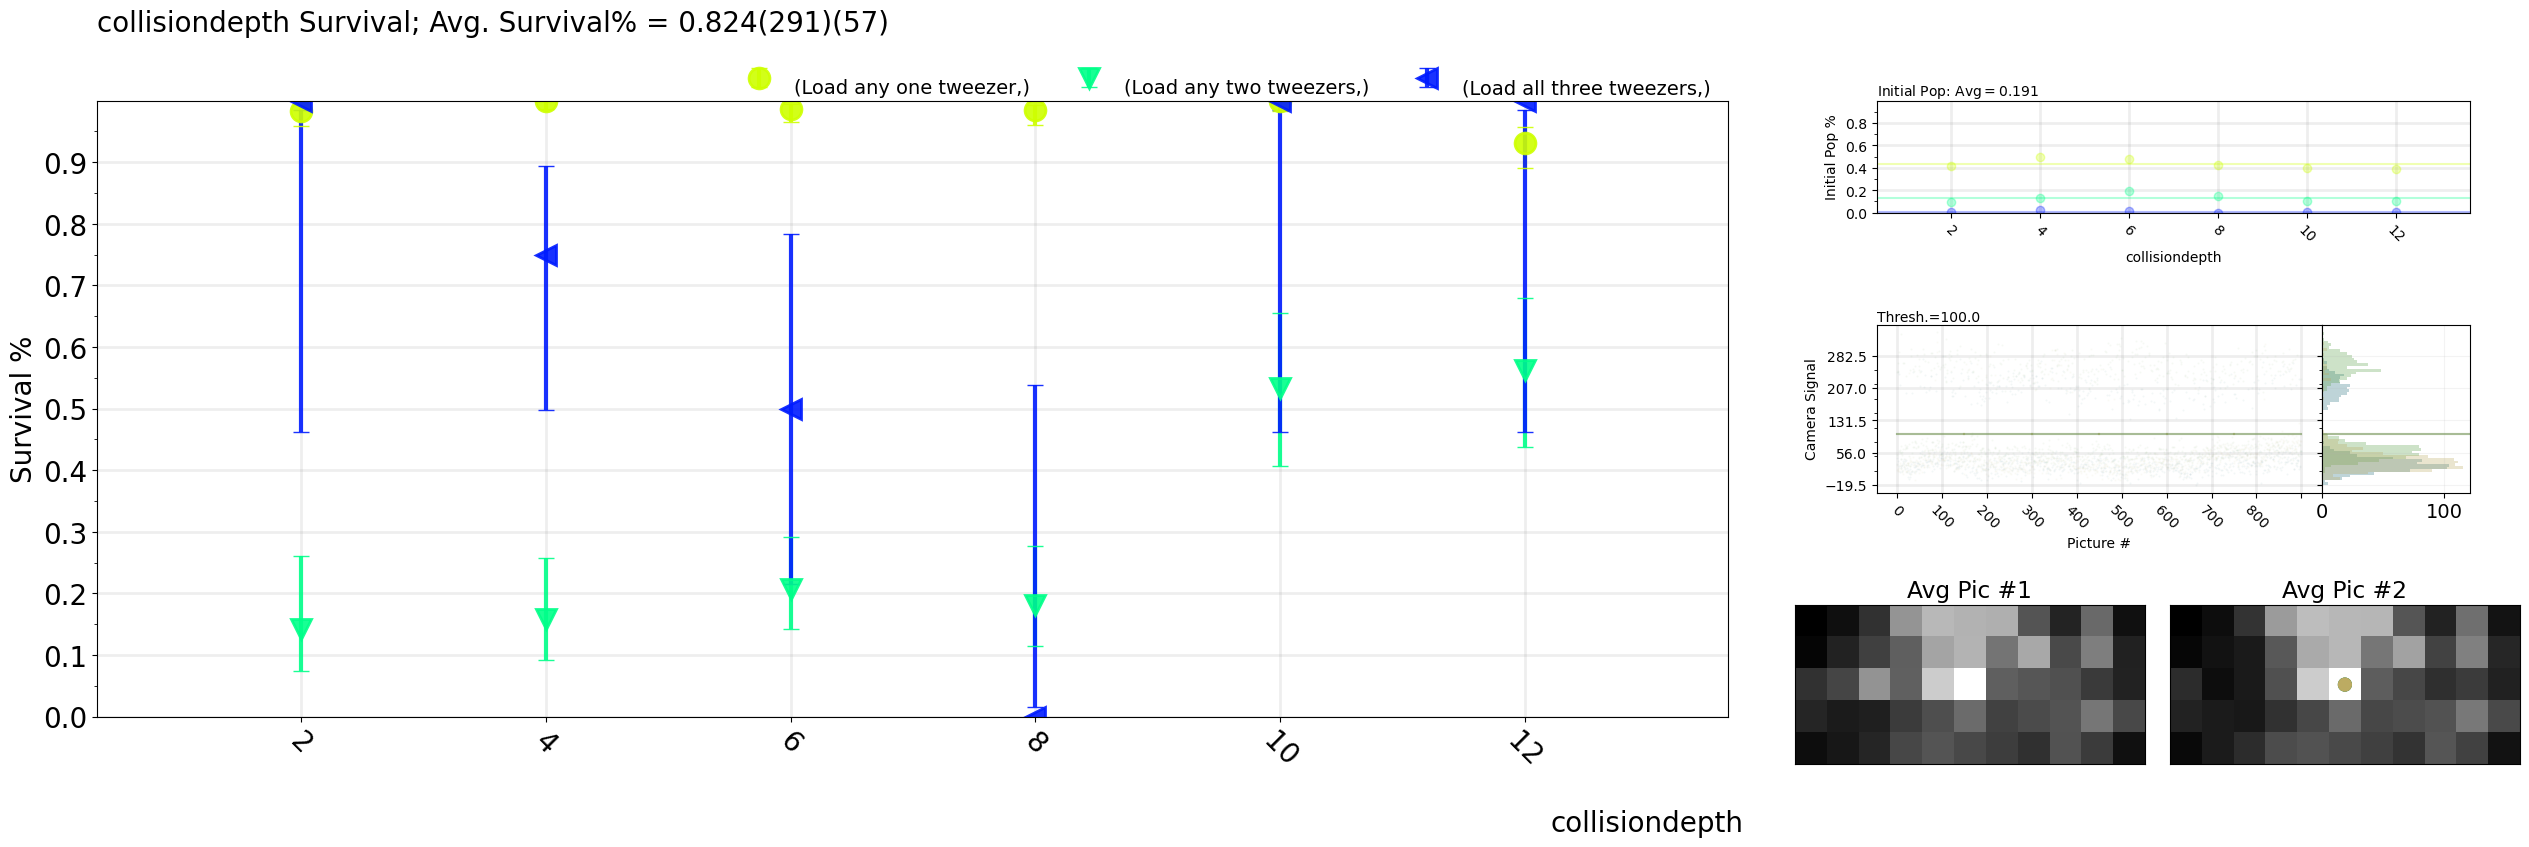

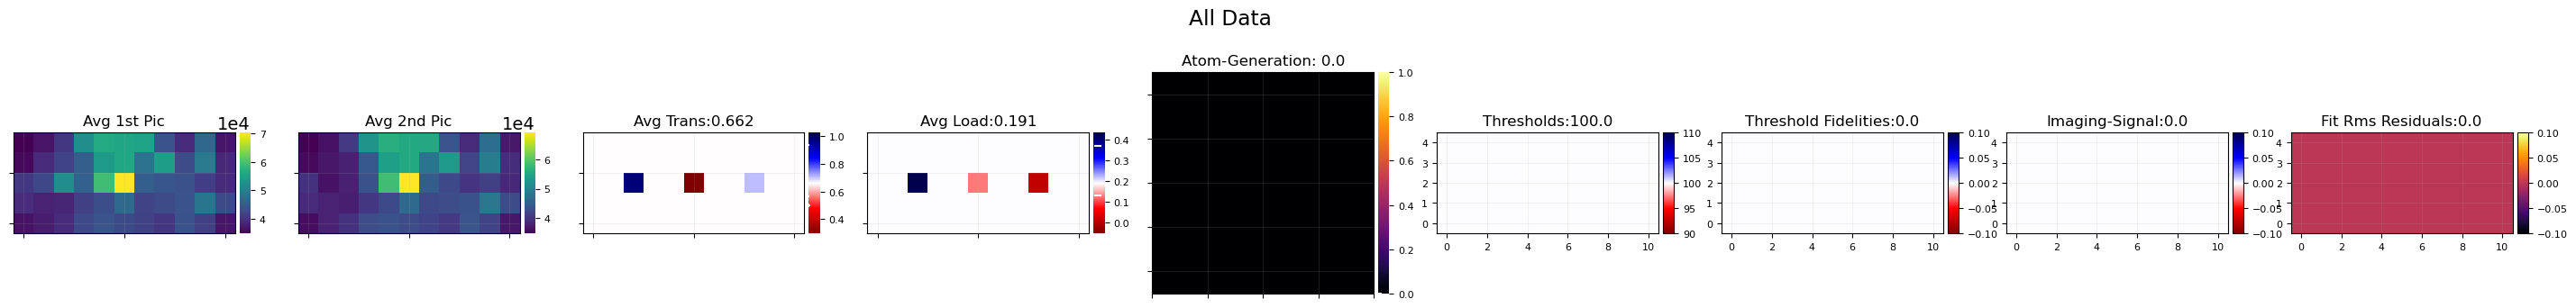

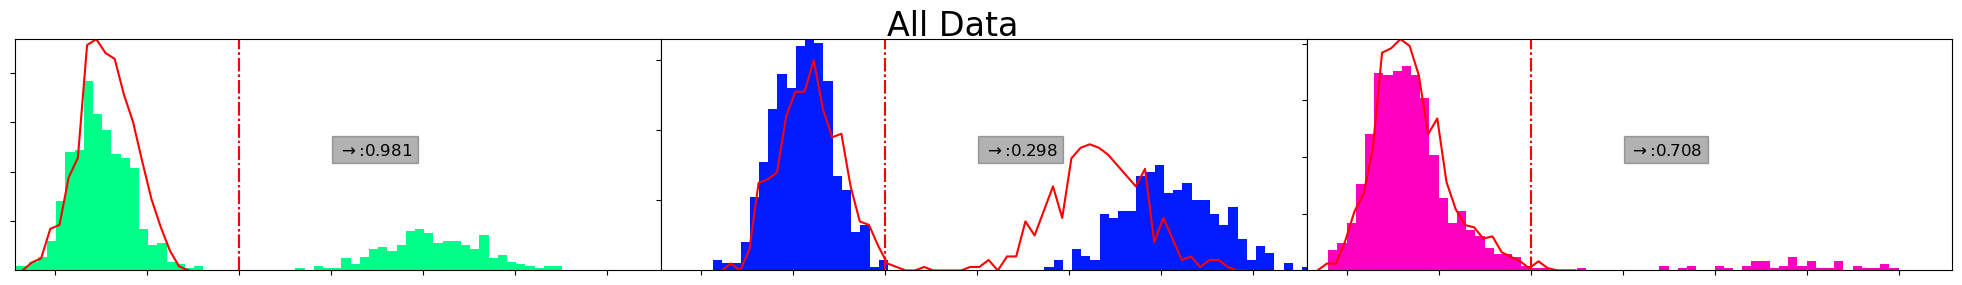

In [39]:
mp.Transfer(6, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 100)]);

Collision depth at collision time of 20 ms. Large increase in 2-1 at 10. Lets try cooling time at depth of 10

### File 7 (3_Tweezer_Merge_GMCollision_Stage_F1): Collision time - f_col= 116

Number of Pictures: 10000; Picture Dimensions: 5 x 11
Variations: 20;	Repetitions: 250;	Exp File Version: 4;
Experiment started at (H:M:S) 10:58:12: on (Y-M-D) 2021-9-15, And ended at 11:37:59: on 2021-9-15
Experiment Notes: huge jump at 40 ms...lets scan higher



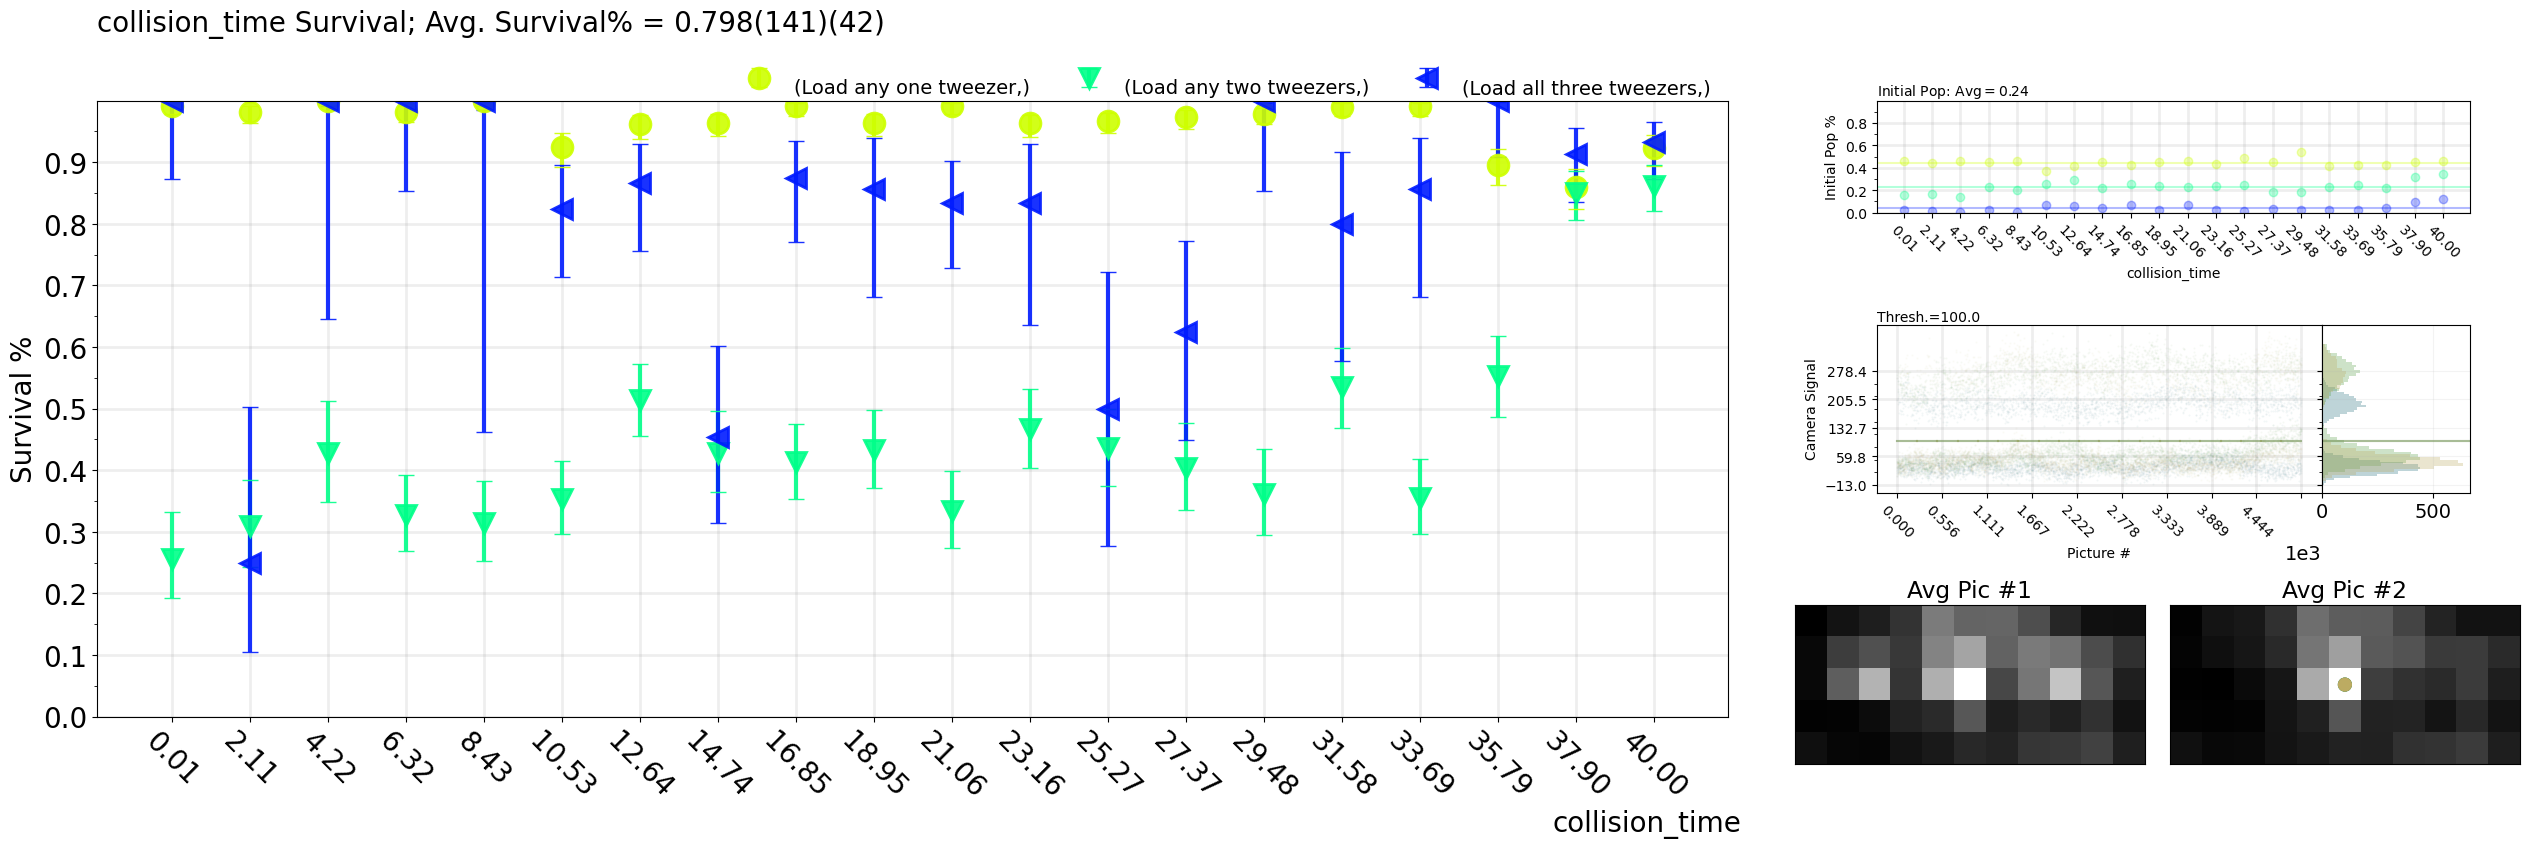

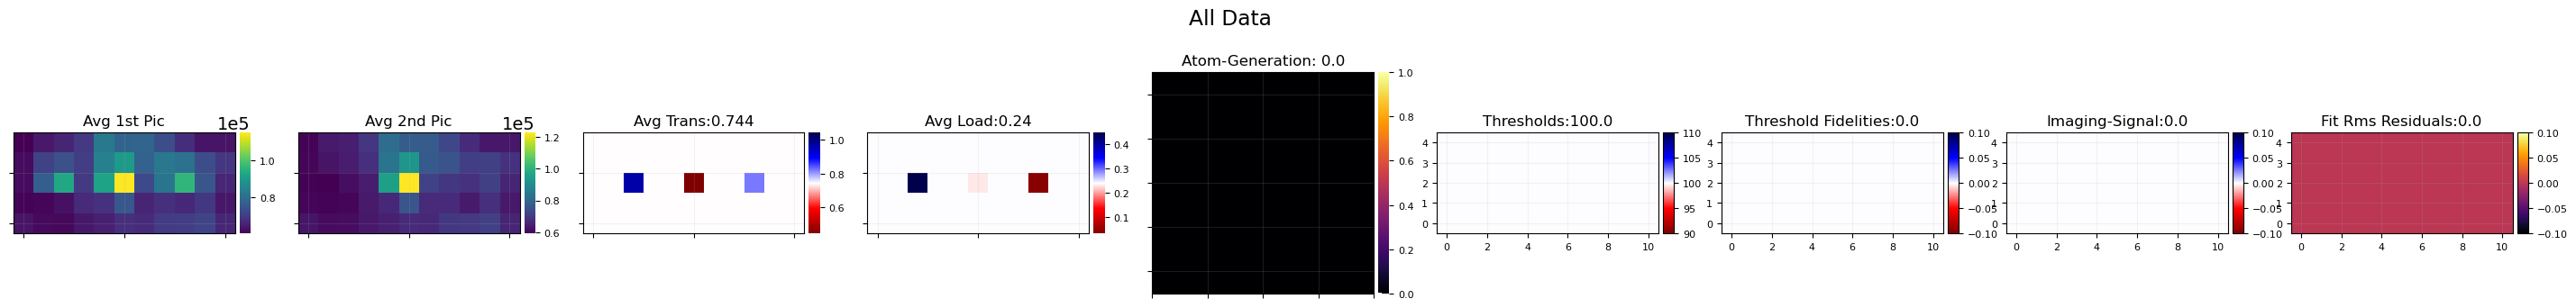

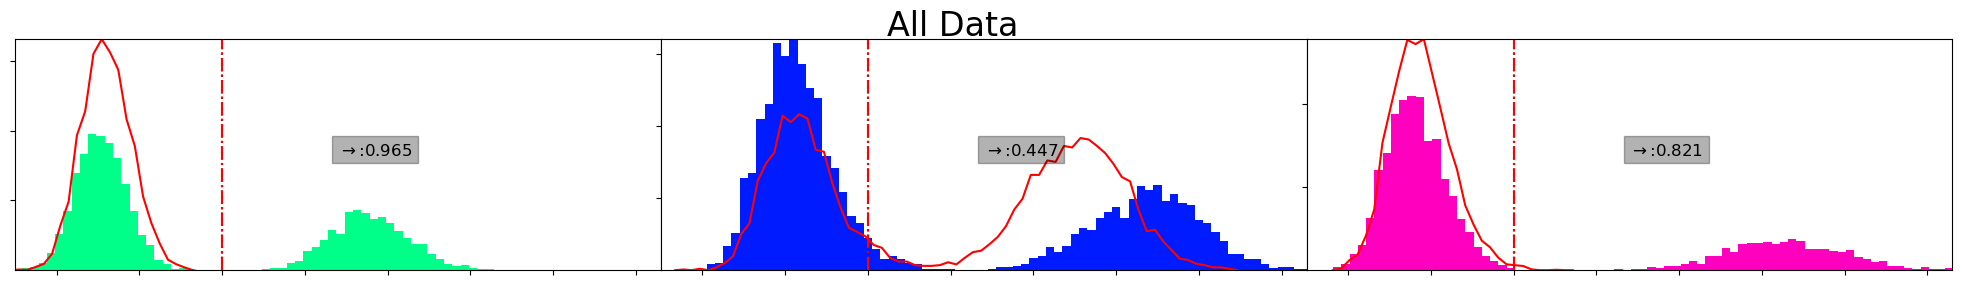

In [40]:
mp.Transfer(7, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 100)]);

### File 8 (3_Tweezer_Merge_GMCollision_Stage_F1): Scan collision freq

Number of Pictures: 10000; Picture Dimensions: 5 x 11
Variations: 20;	Repetitions: 250;	Exp File Version: 4;
Experiment started at (H:M:S) 12:31:35: on (Y-M-D) 2021-9-15, And ended at 13:11:6: on 2021-9-15
Experiment Notes: F'=1, depth = 10



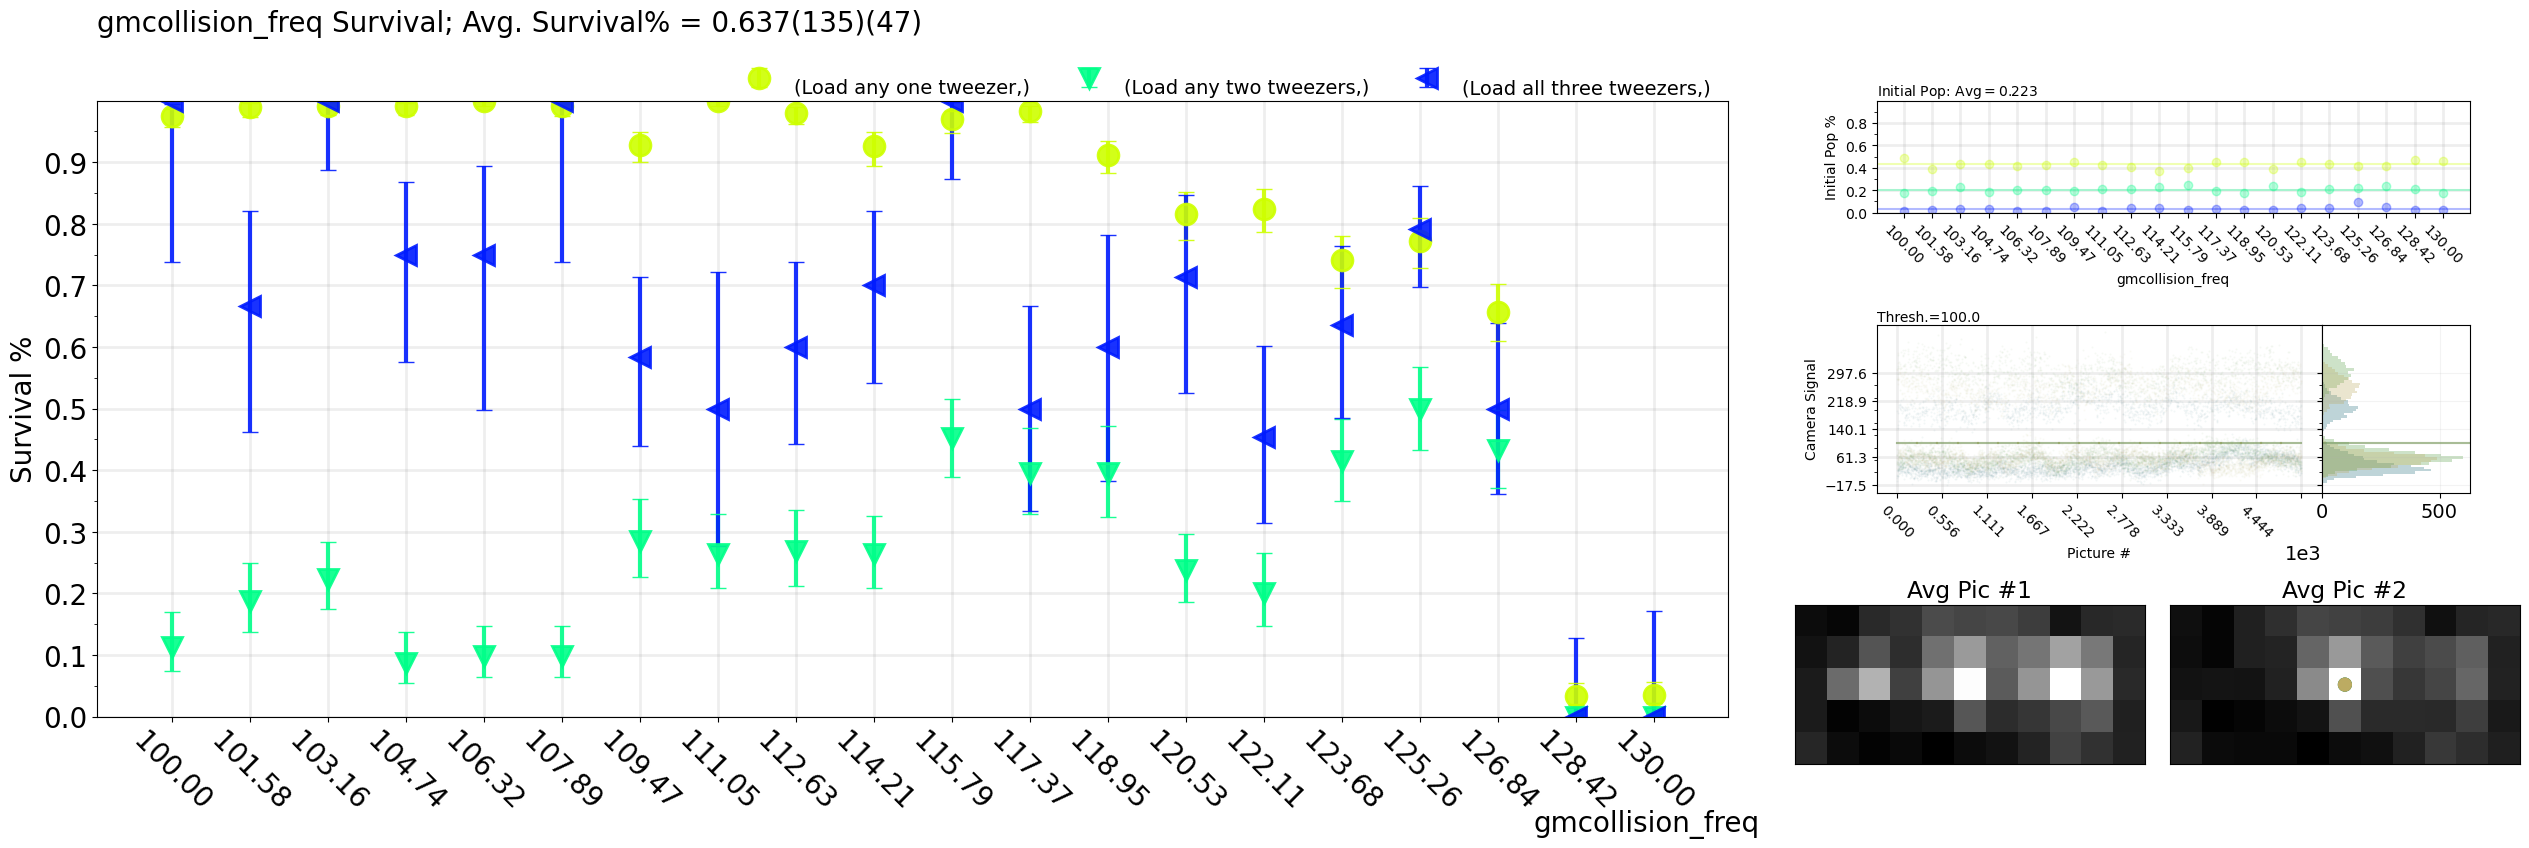

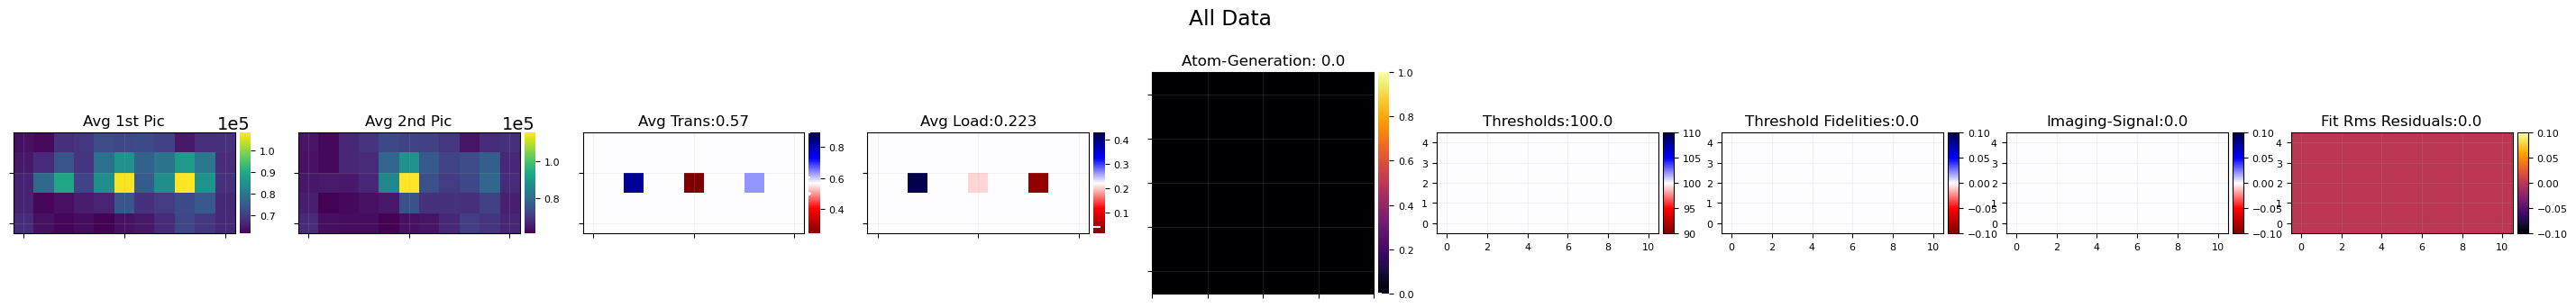

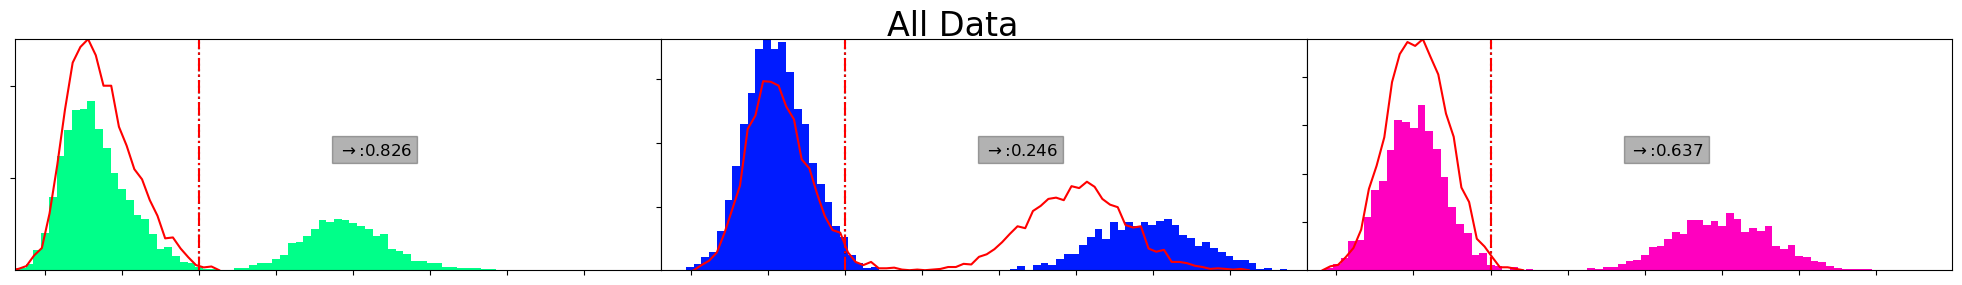

In [41]:
mp.Transfer(8, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 100)]);

### File 9 (3_Tweezer_Merge_GMCollision_Stage_F1): Collision time large range

Number of Pictures: 3000; Picture Dimensions: 5 x 11
Variations: 10;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 13:21:0: on (Y-M-D) 2021-9-15, And ended at 13:34:17: on 2021-9-15
Experiment Notes: F'=1 data. Depth = 10, collision freq =116



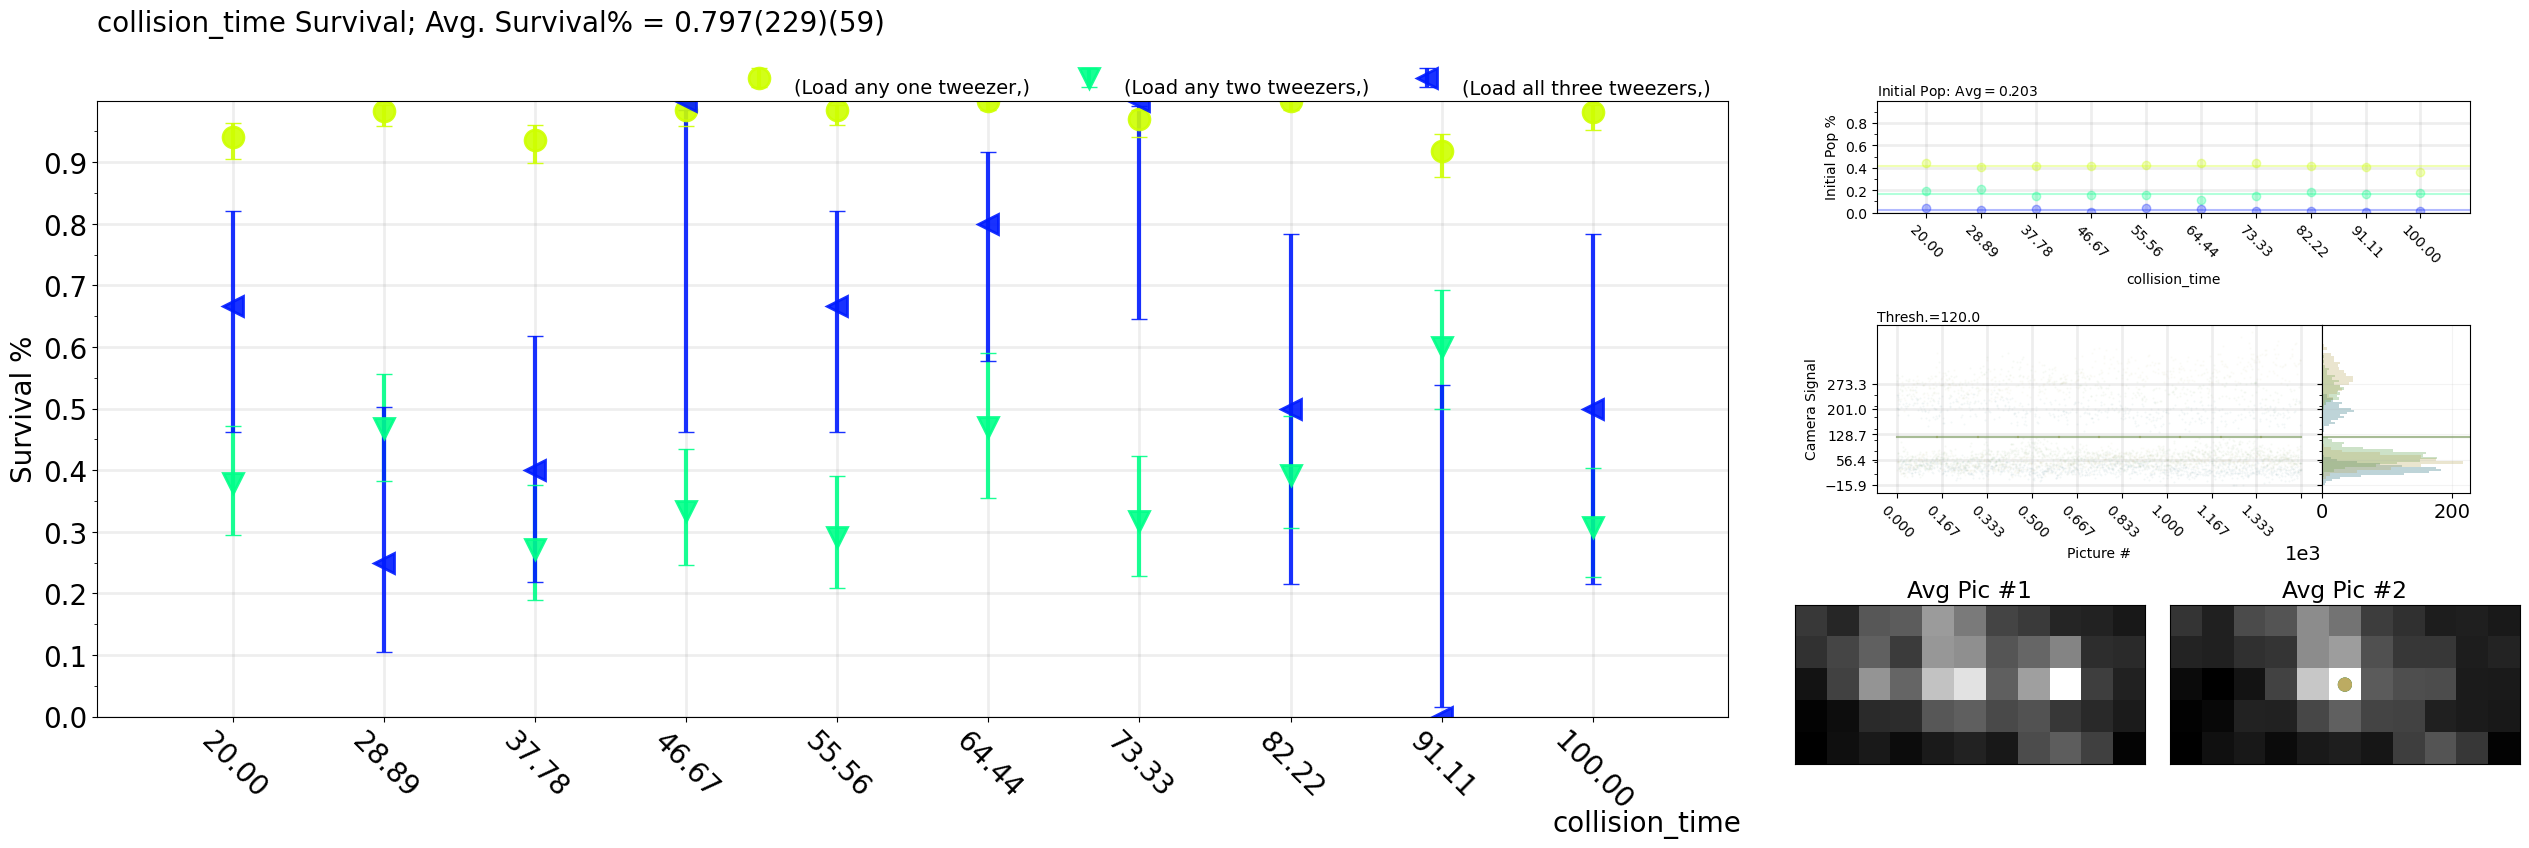

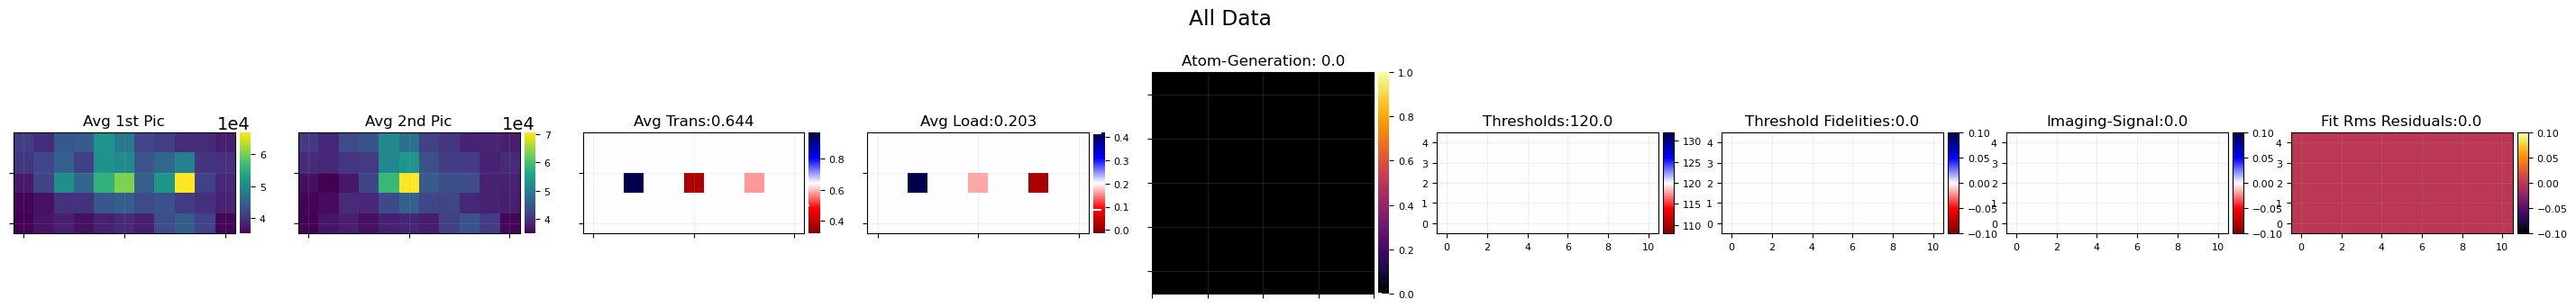

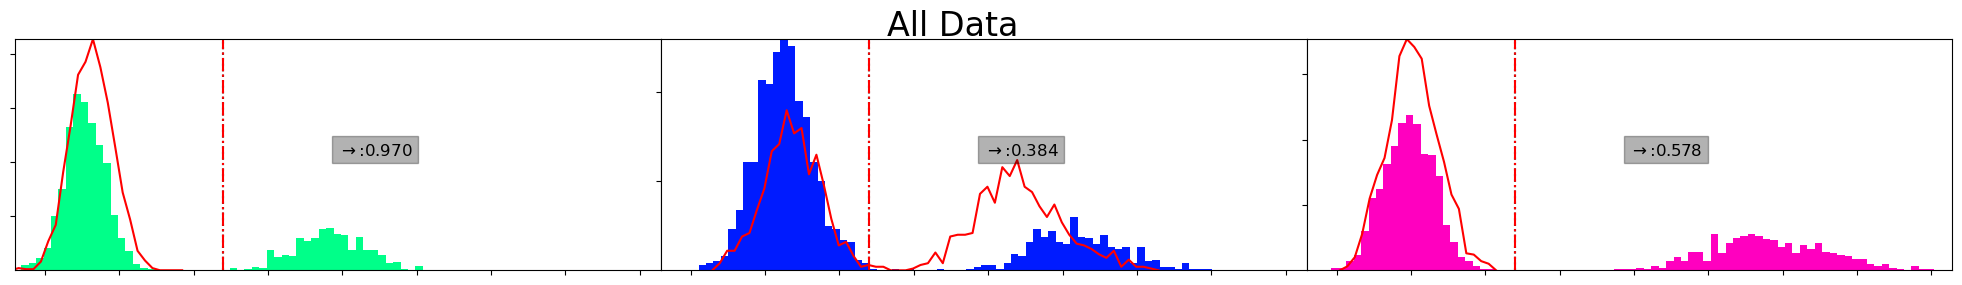

In [42]:
mp.Transfer(9, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 120)]);

sta: Organizing Transfer Data...
Number of Pictures: 16000; Picture Dimensions: 5 x 11
Variations: 10;	Repetitions: 800;	Exp File Version: 4;
Experiment started at (H:M:S) 13:46:19: on (Y-M-D) 2021-9-15, And ended at 14:48:57: on 2021-9-15
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
no option???
no option???
no option???
no option???
no option???
no option???
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting.............sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 2
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 2
sta: Handling Fitting...
key: [ 0.5         2.11111111  3.72222222  5.33333333  6.94444444  8.55555556
 10.16666667 11.77777778 13.38888889 15.        ]
(2, 10)
[0.3825, 0.42625, 0.41625, 0.4225, 0.41875, 0.40875, 0.4275, 0.40875, 0.42375, 0.38625]
(2, 10)
[0.1325, 0.1425, 0.14875, 0.14, 0.1325, 0.115, 0.1175, 0.13, 0.1

..\Analysis_Python_Files\MatplotlibPlotters.py:653: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

..\Analysis_Python_Files\MatplotlibPlotters.py:682: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



IndexError: list index out of range

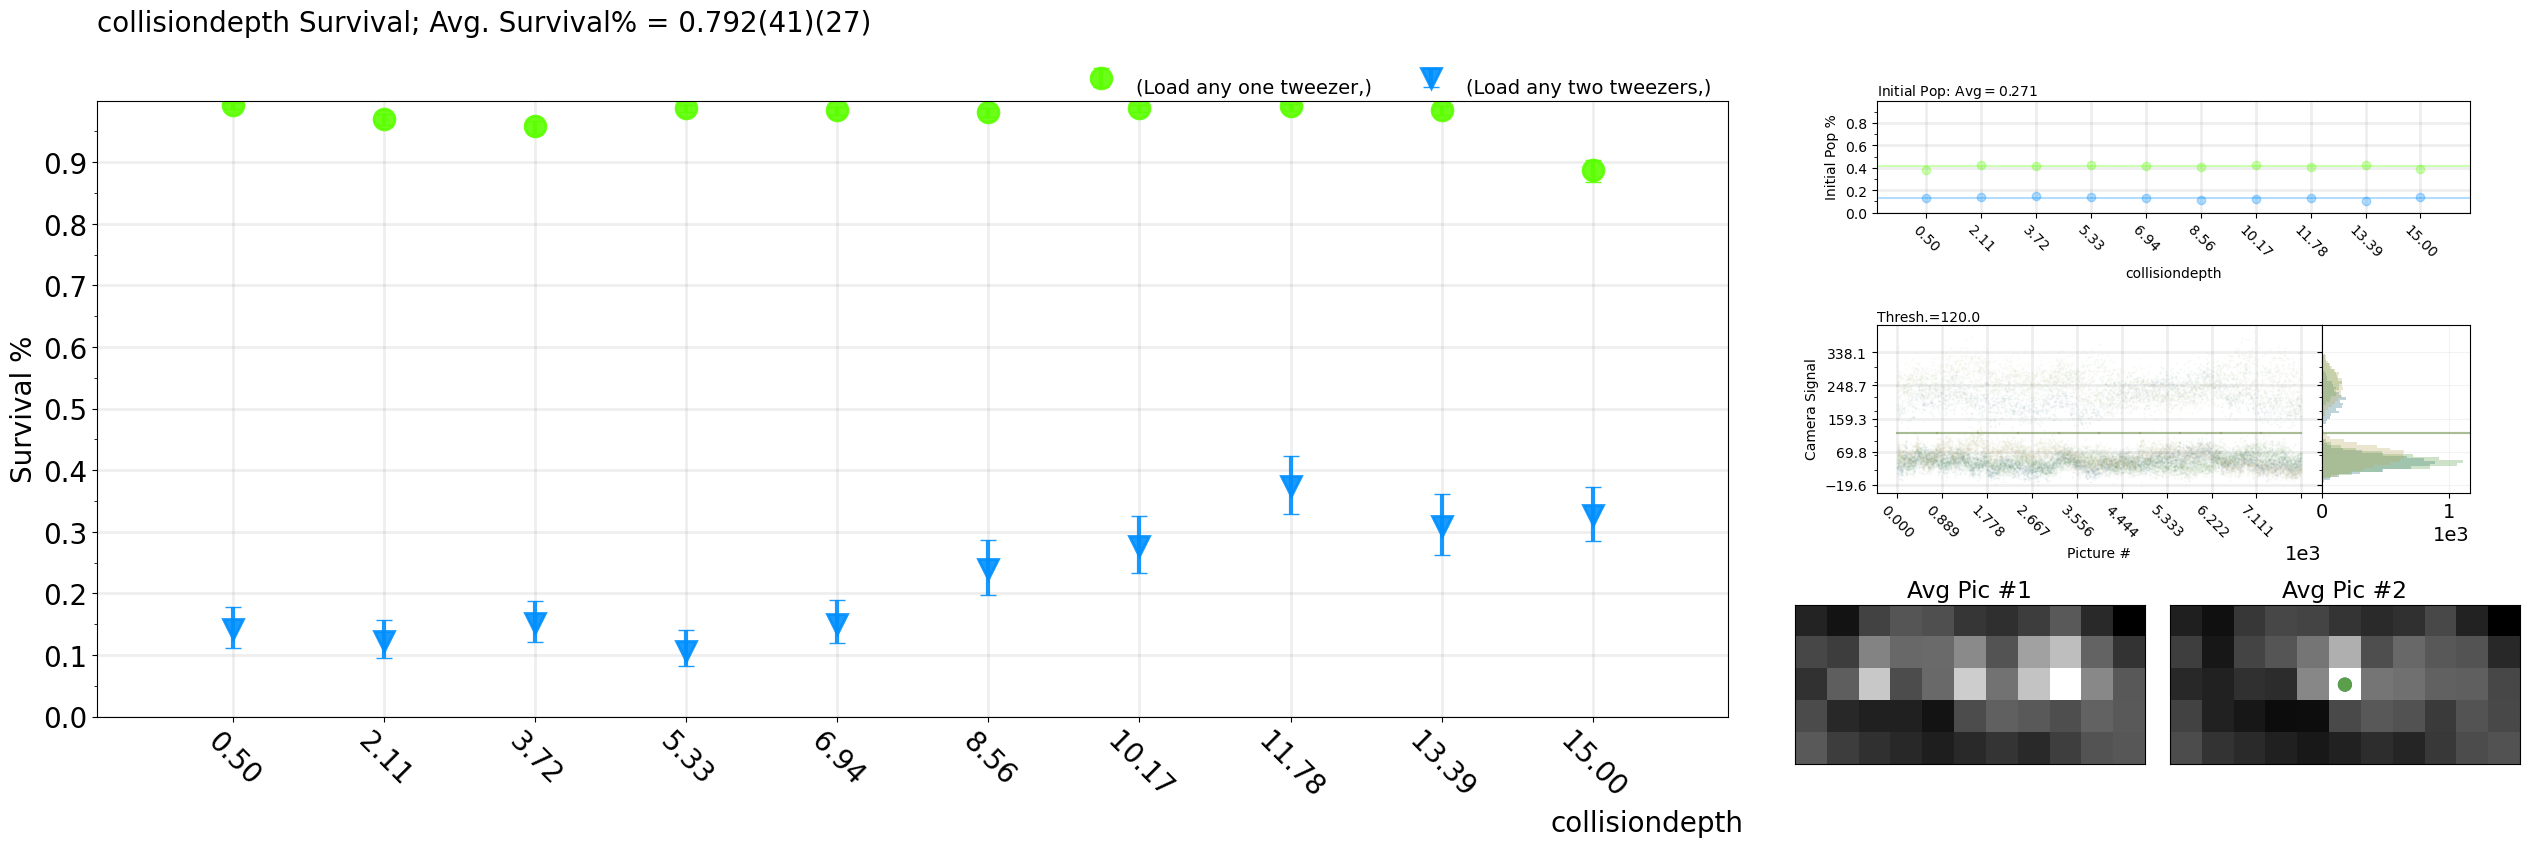

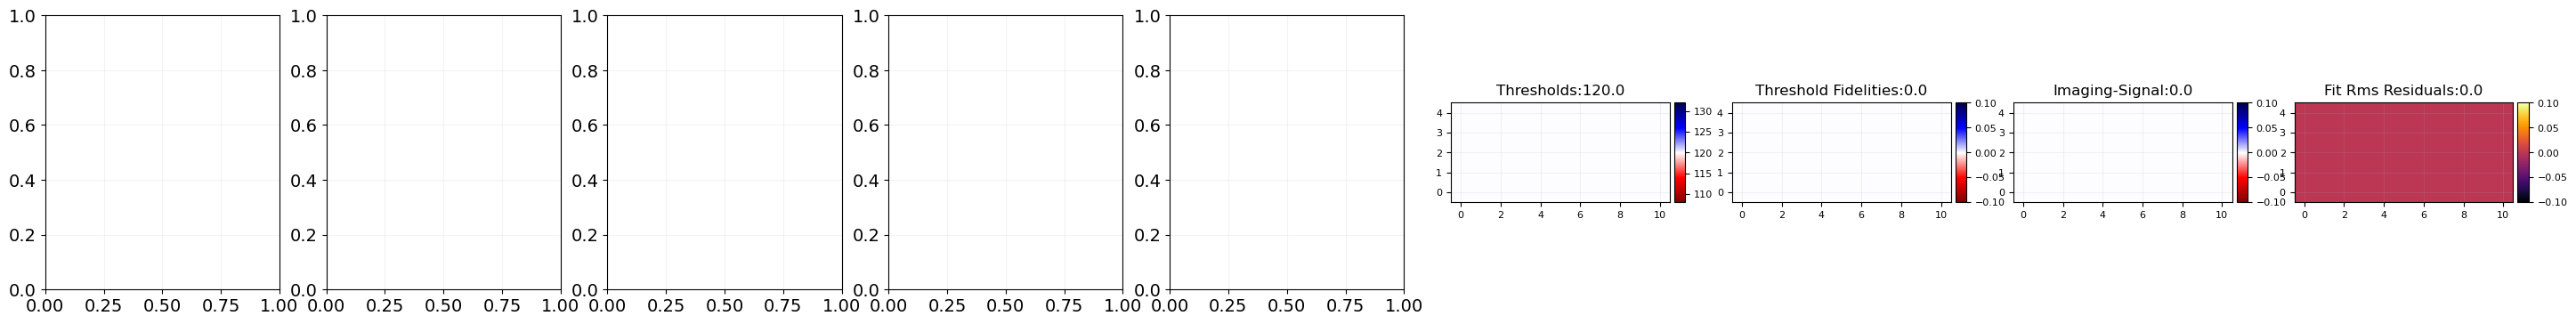

In [37]:
mp.Transfer(10, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 120)]);

sta: Organizing Transfer Data...
Number of Pictures: 2400; Picture Dimensions: 5 x 23
Variations: 8;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 15:28:33: on (Y-M-D) 2021-9-15, And ended at 15:37:10: on 2021-9-15
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 3
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 3
sta: Handling Fitting...
key: [124. 126. 128. 130. 132. 134. 136. 138.]


..\Analysis_Python_Files\MatplotlibPlotters.py:653: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

..\Analysis_Python_Files\MatplotlibPlotters.py:682: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



(3, 8)
[0.08666666666666667, 0.16, 0.28, 0.24, 0.0, 0.0, 0.0, 0.0]
(3, 8)
[0.06, 0.12666666666666668, 0.2, 0.32666666666666666, 0.0, 0.0, 0.0, 0.0]
(3, 8)
[0.08, 0.23333333333333334, 0.26666666666666666, 0.32, 0.0, 0.0, 0.0, 0.0]
Making Avg Plots...
HDF5 File number 12 Has not been annotated. Please call exp.annotate() to annotate the file.


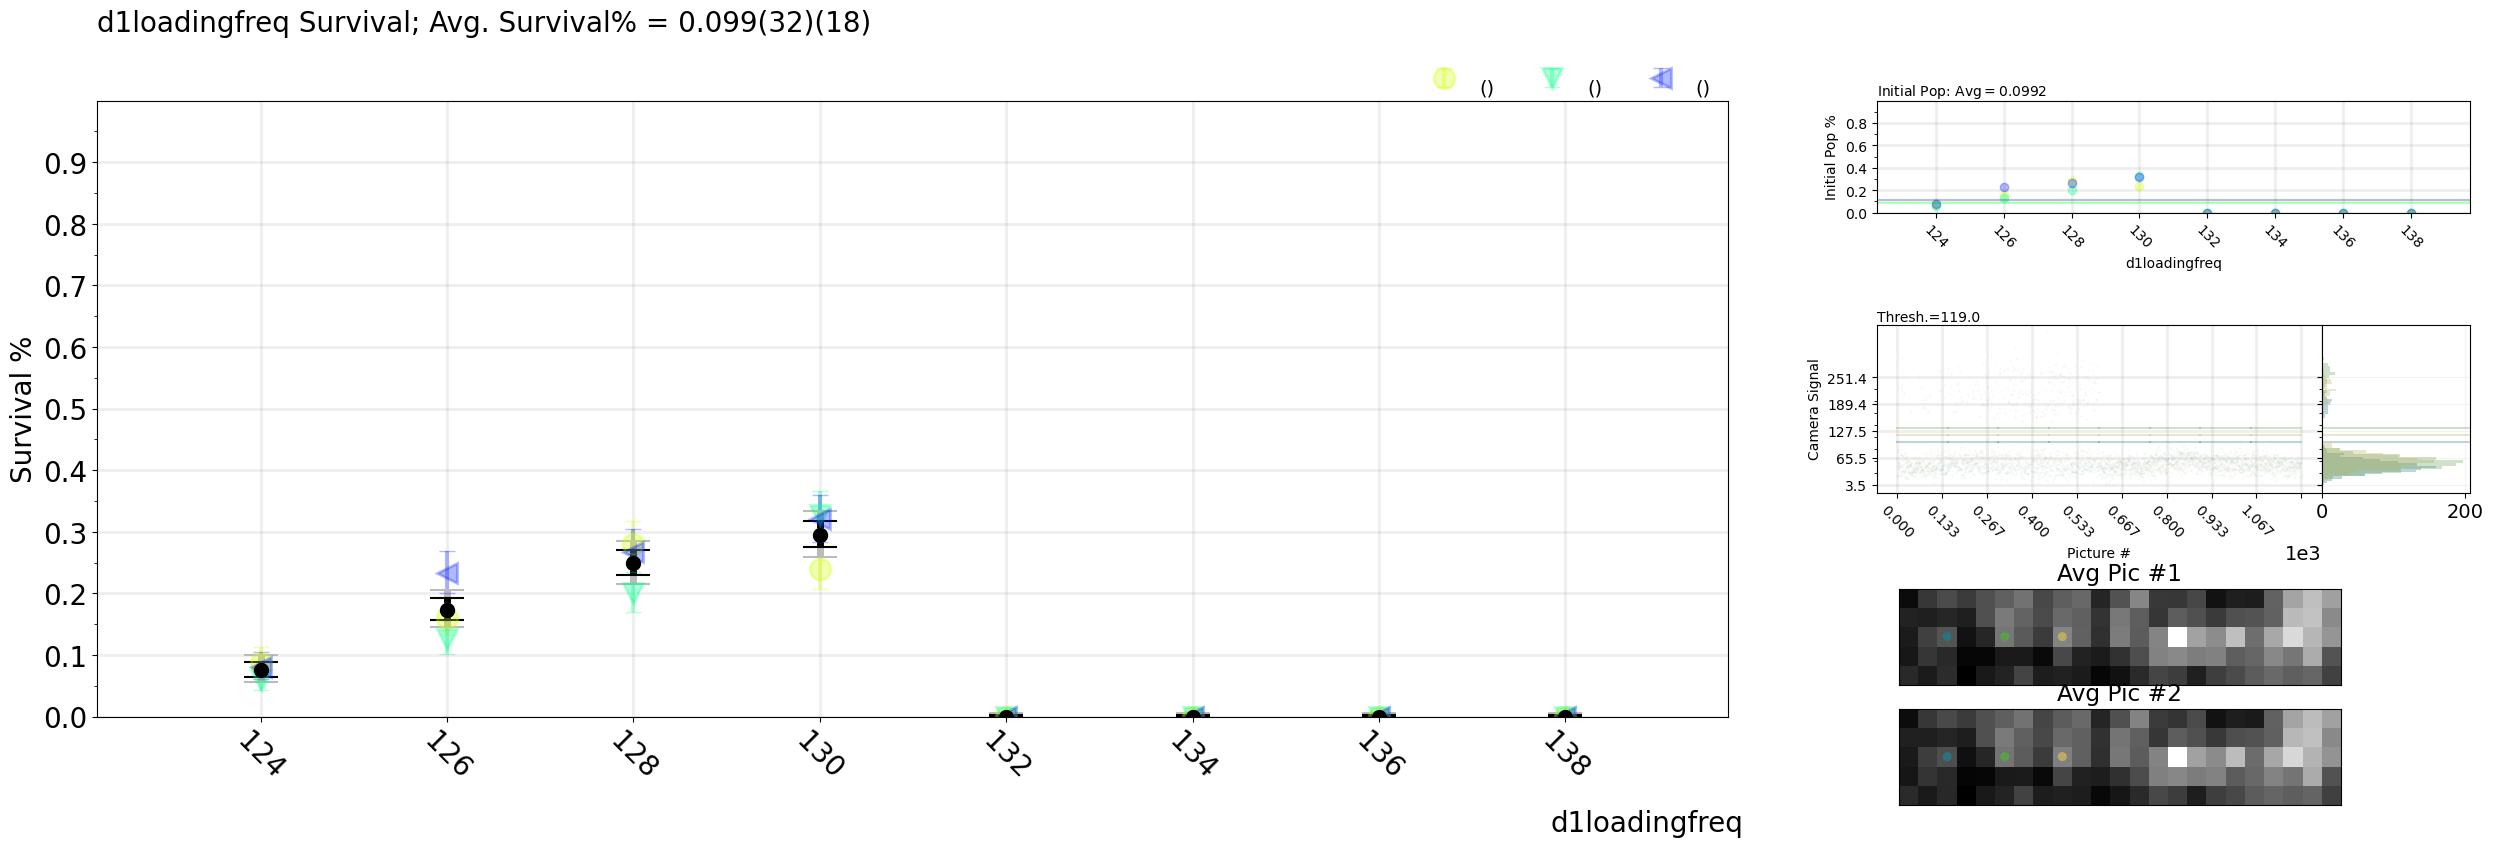

annotating file 12
HDF5 File number 12 Has not been annotated. Please call exp.annotate() to annotate the file.


Run Title ("q" to Quit): q


RuntimeError: Annotation Quit

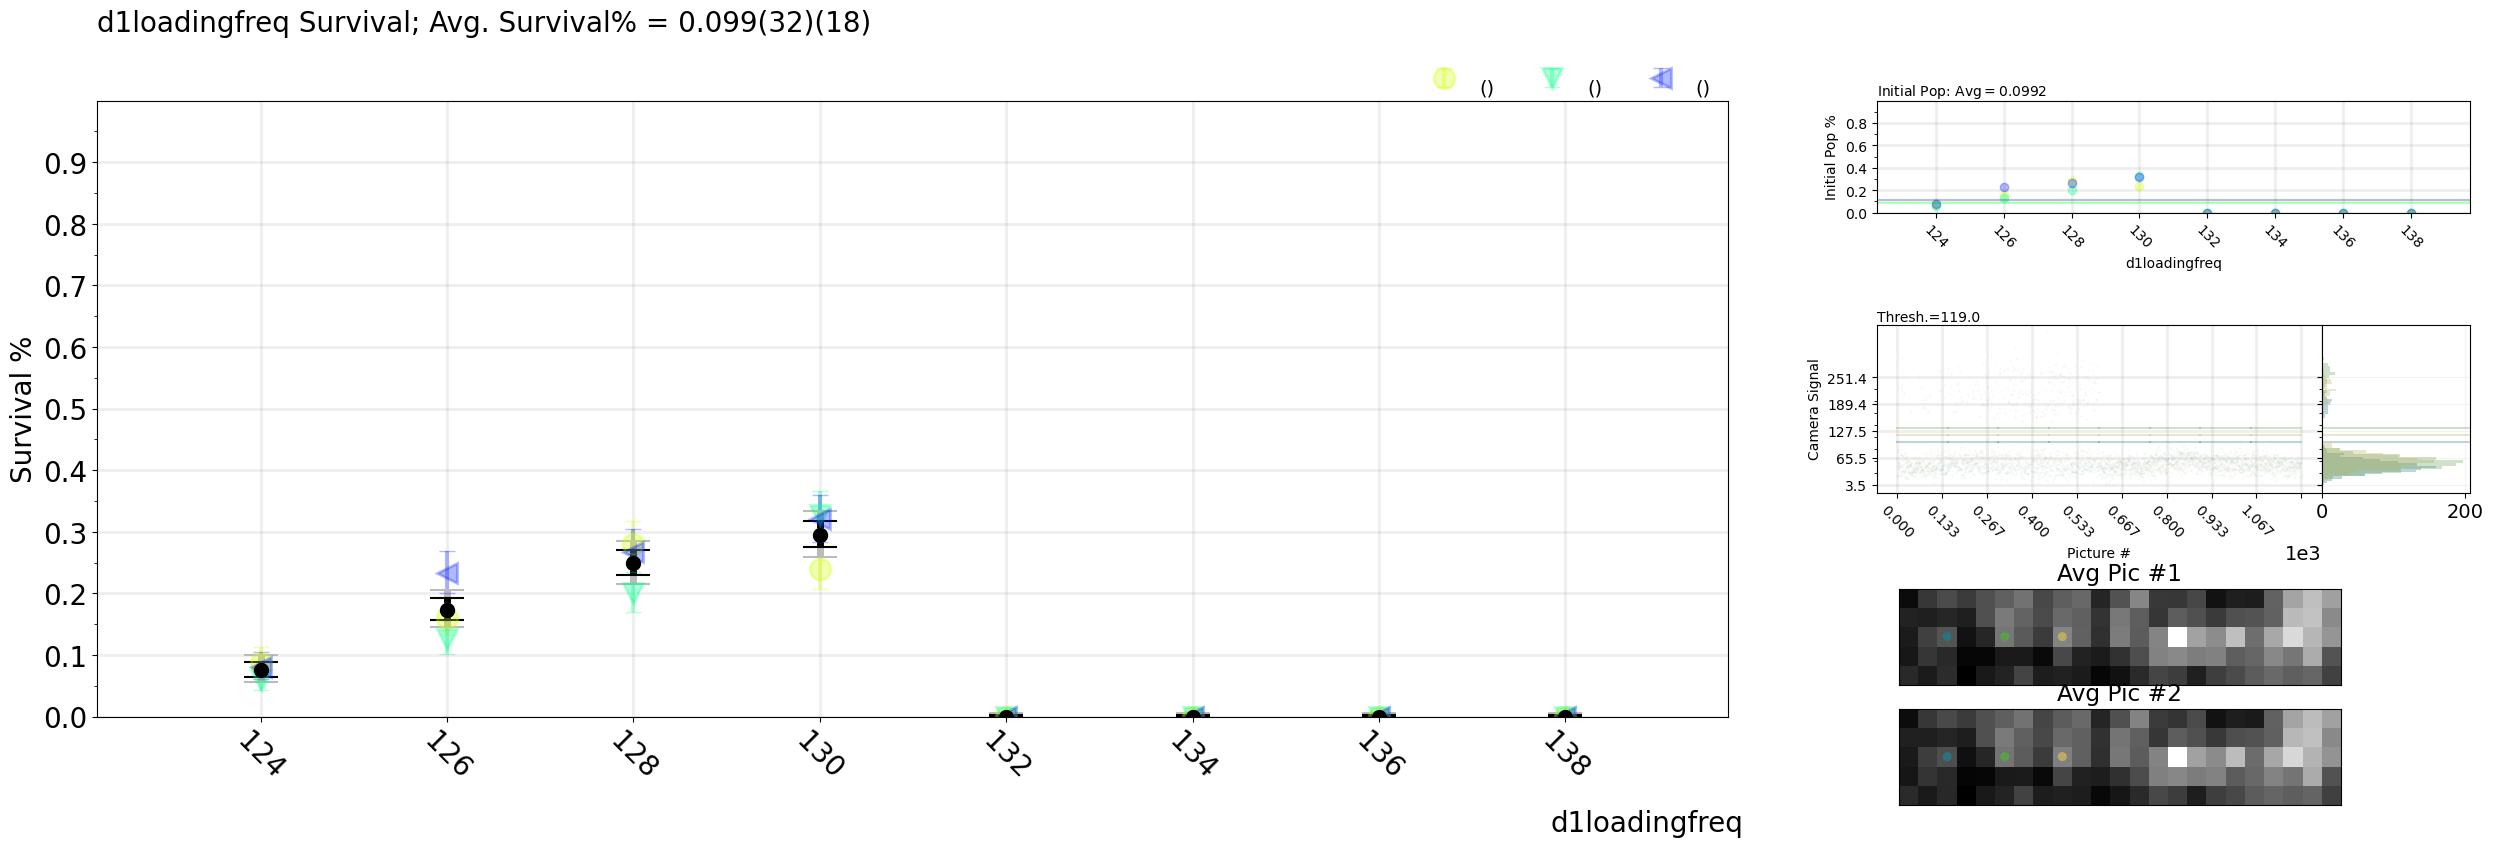

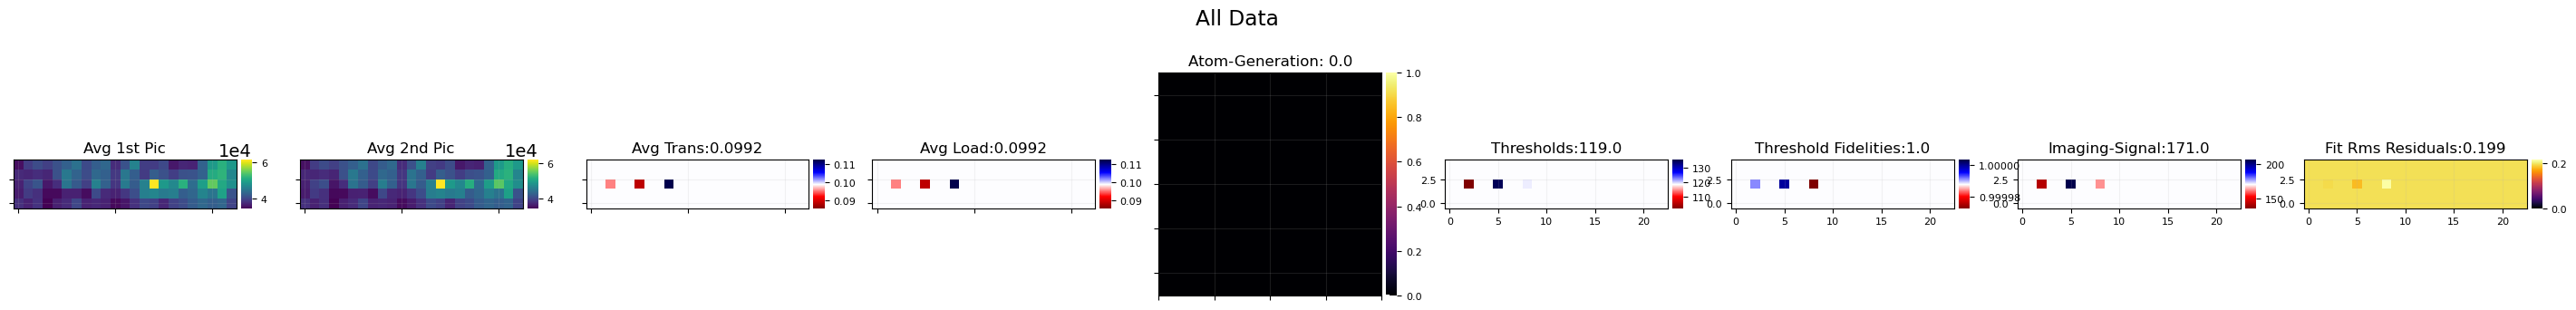

In [47]:
mp.Loading(12,atomlocs);

sta: Organizing Transfer Data...
Number of Pictures: 1800; Picture Dimensions: 5 x 23
Variations: 6;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 15:46:21: on (Y-M-D) 2021-9-15, And ended at 15:52:49: on 2021-9-15
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting.........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 3
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 3
sta: Handling Fitting...
key: [-8.66666667 -7.33333333 -6.         -4.66666667 -3.33333333 -2.        ]


..\Analysis_Python_Files\MatplotlibPlotters.py:653: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

..\Analysis_Python_Files\MatplotlibPlotters.py:682: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



(3, 6)
[0.08666666666666667, 0.15333333333333332, 0.15333333333333332, 0.28, 0.37333333333333335, 0.38]
(3, 6)
[0.08666666666666667, 0.10666666666666667, 0.15333333333333332, 0.36, 0.42, 0.4666666666666667]
(3, 6)
[0.08, 0.18, 0.22666666666666666, 0.3333333333333333, 0.3933333333333333, 0.48]
Making Avg Plots...
HDF5 File number 13 Has not been annotated. Please call exp.annotate() to annotate the file.


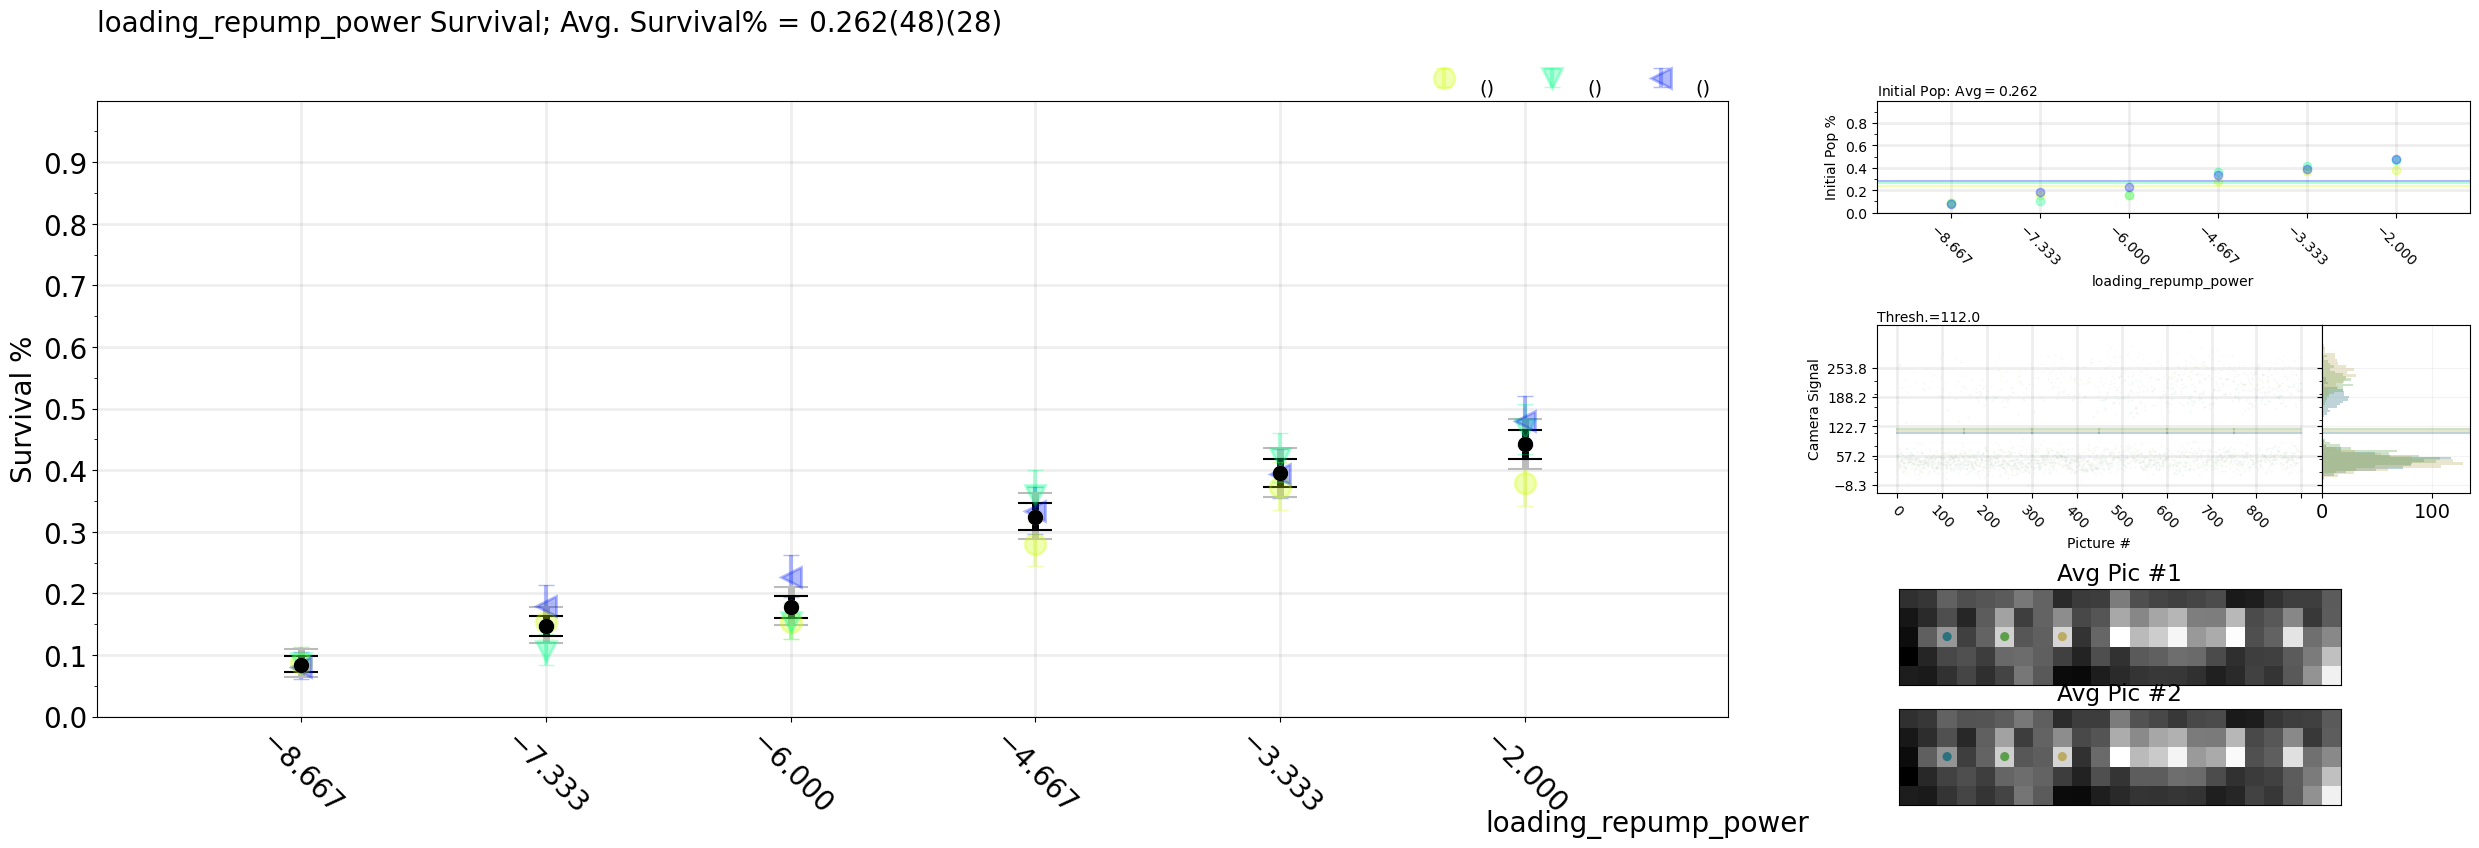

annotating file 13
HDF5 File number 13 Has not been annotated. Please call exp.annotate() to annotate the file.


Run Title ("q" to Quit): q


RuntimeError: Annotation Quit

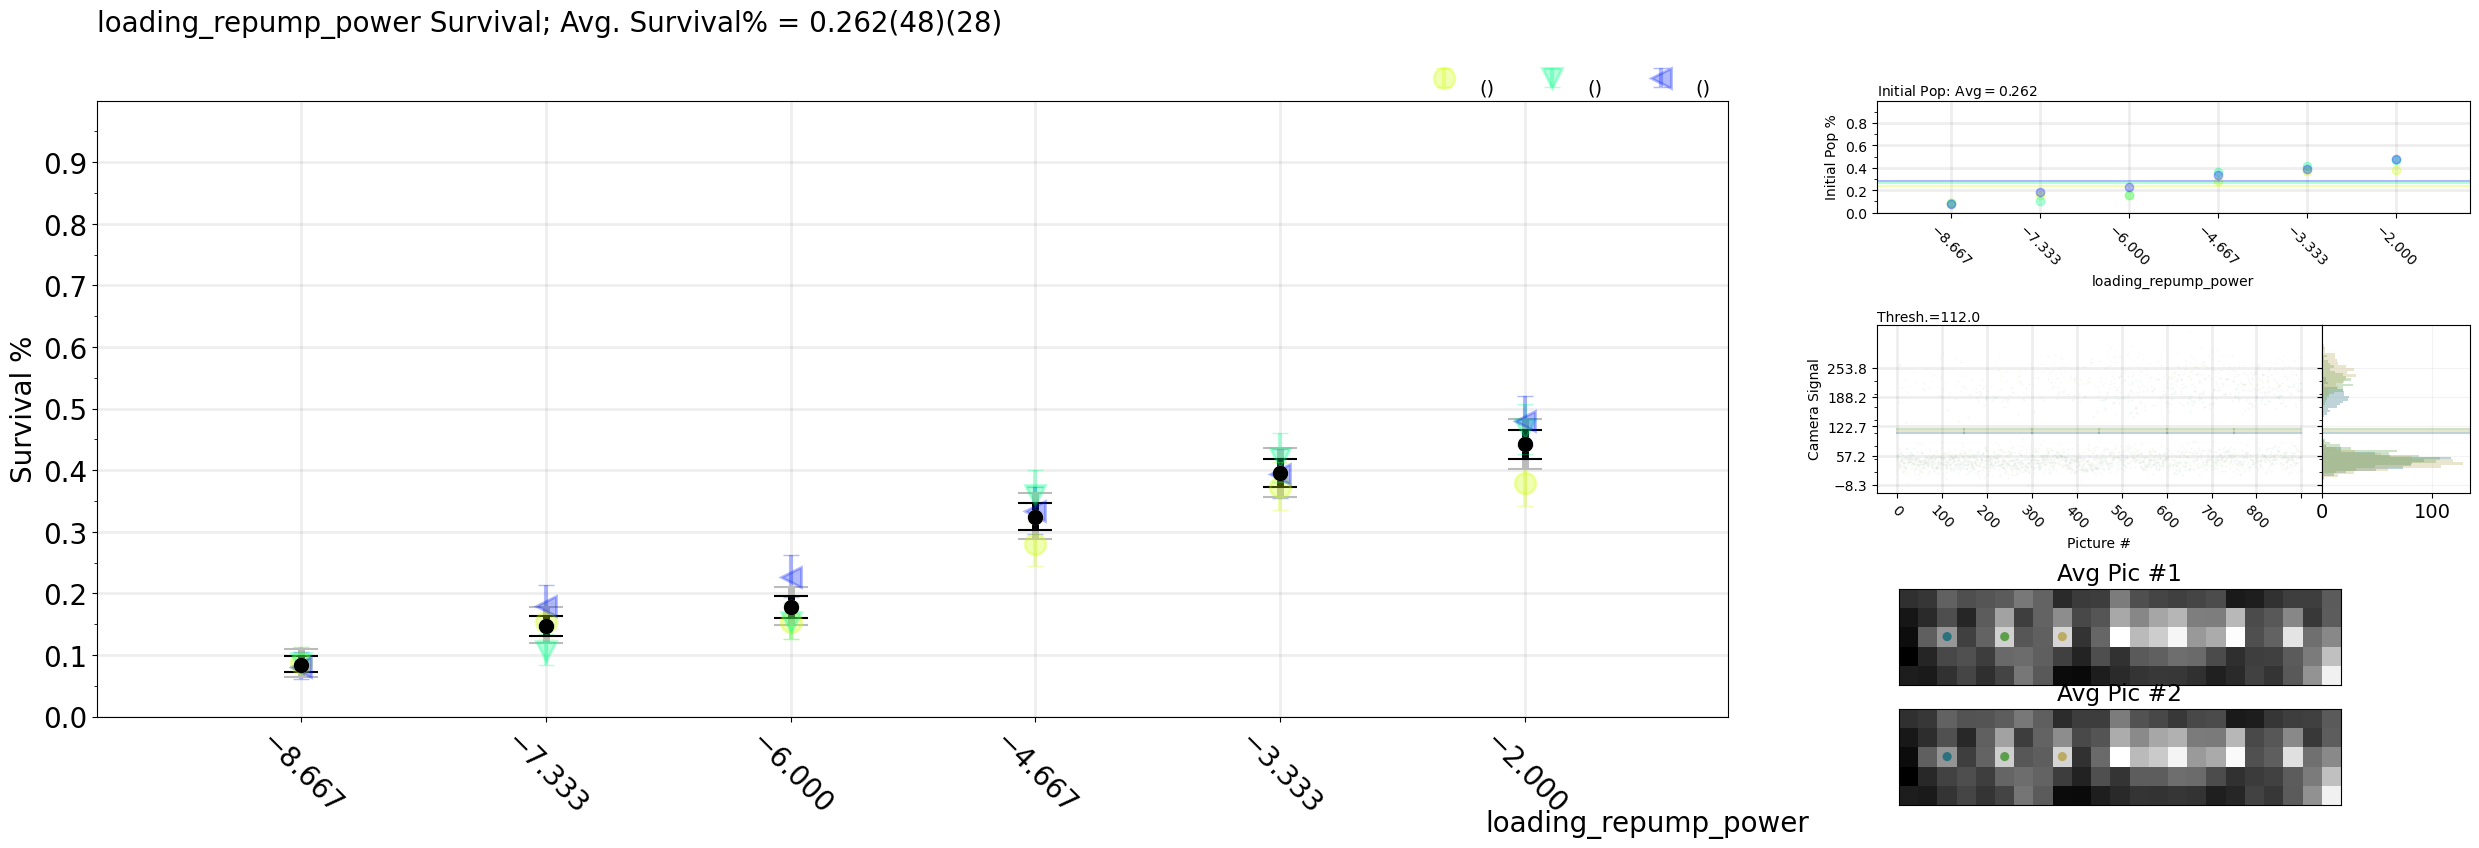

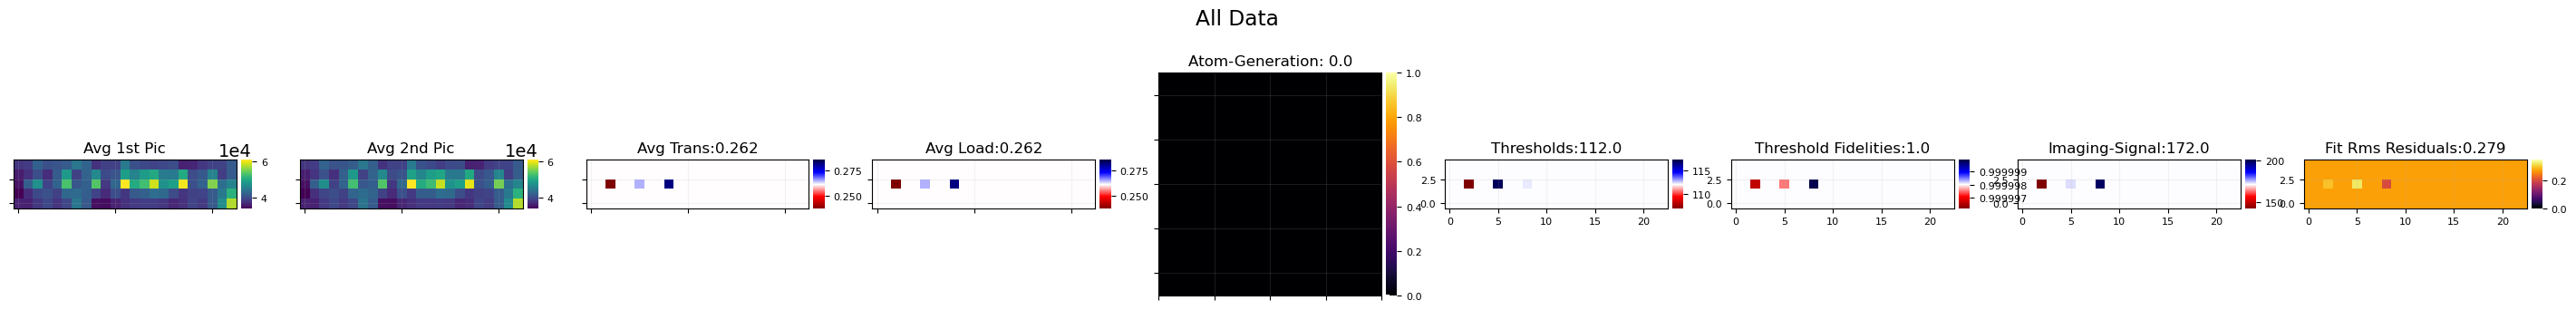

In [48]:
mp.Loading(13,atomlocs);

sta: Organizing Transfer Data...
Number of Pictures: 2400; Picture Dimensions: 5 x 23
Variations: 8;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 15:55:36: on (Y-M-D) 2021-9-15, And ended at 16:4:14: on 2021-9-15
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 3
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 3
sta: Handling Fitting...
key: [-0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]


..\Analysis_Python_Files\MatplotlibPlotters.py:653: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

..\Analysis_Python_Files\MatplotlibPlotters.py:682: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



(3, 8)
[0.12666666666666668, 0.30666666666666664, 0.5066666666666667, 0.54, 0.5466666666666666, 0.48, 0.5666666666666667, 0.52]
(3, 8)
[0.17333333333333334, 0.30666666666666664, 0.32, 0.41333333333333333, 0.5266666666666666, 0.5066666666666667, 0.5533333333333333, 0.5533333333333333]
(3, 8)
[0.2733333333333333, 0.22666666666666666, 0.2733333333333333, 0.4266666666666667, 0.56, 0.5533333333333333, 0.46, 0.62]
Making Avg Plots...
HDF5 File number 14 Has not been annotated. Please call exp.annotate() to annotate the file.


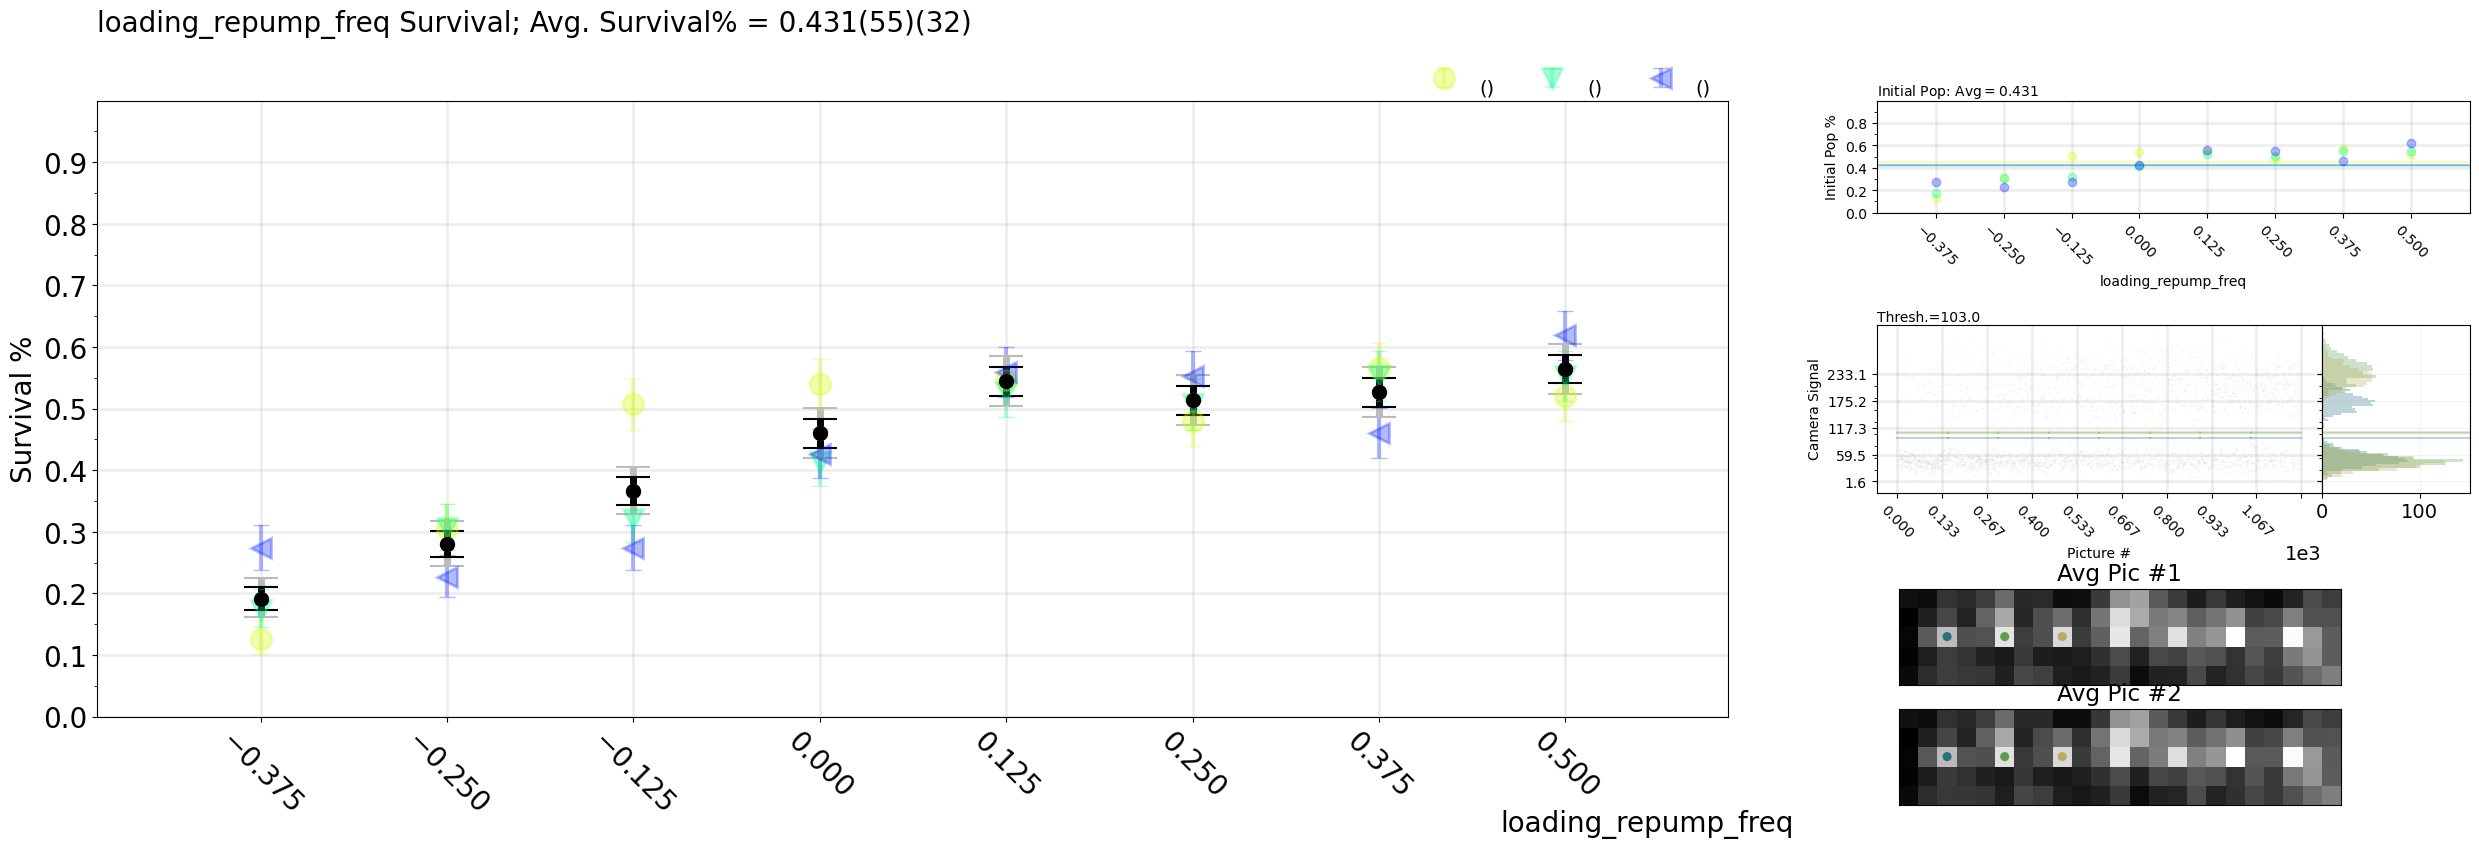

annotating file 14
HDF5 File number 14 Has not been annotated. Please call exp.annotate() to annotate the file.


In [ ]:
mp.Loading(14,atomlocs);